In [11]:
import tensorflow as tf
from tensorflow import keras

In [4]:
# Loading the MNIST data set with samples and splitting it
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# Normalizing the data (making length = 1)
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [6]:
X_test.shape

(10000, 28, 28)

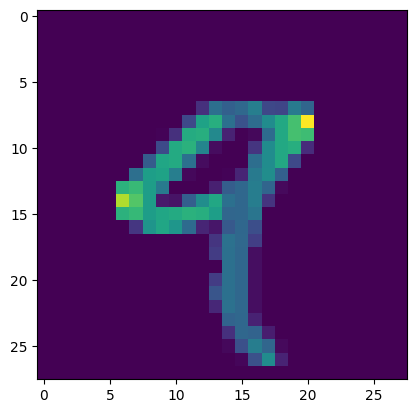

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[4])

In [12]:
# Create a neural network model
# Add one flattened input layer for the pixels
# Add two dense hidden layers
# Add one dense output layer for the 10 digits
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation="relu"))
model.add(tf.keras.layers.Dense(units=128, activation="relu"))
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

In [14]:
# Compiling and optimizing model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0318 - accuracy: 0.9890
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0246 - accuracy: 0.9918
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0189 - accuracy: 0.9934
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0174 - accuracy: 0.9939
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0153 - accuracy: 0.9948
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0121 - accuracy: 0.9959
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0118 - accuracy: 0.9956
Epoch 8/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0118 - accuracy: 0.9961
Epoch 9/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0095 - accuracy: 0.9968
Epoch 10/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.008

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Evaluating the model
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1737 - accuracy: 0.9781
0.17373305559158325
0.9781000018119812


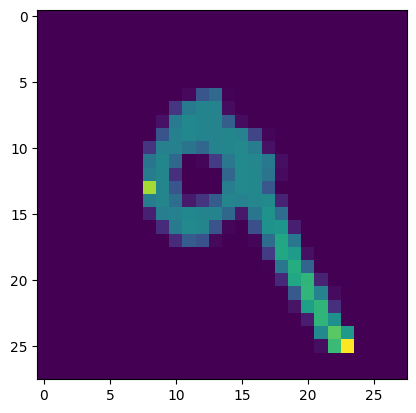

In [19]:
plt.imshow(X_test[7])

In [21]:
print(model.predict(X_test[7].reshape(1,28,28)).argmax(axis=1))

1/1 [==============================] - 0s 23ms/step
[9]


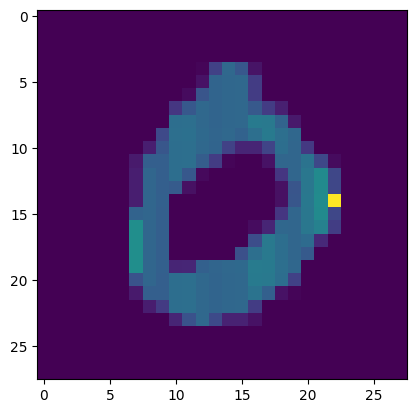

In [23]:
plt.imshow(X_test[3])

In [24]:
print(model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1))

1/1 [==============================] - 0s 24ms/step
[0]
